In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact
import scipy

Populating the interactive namespace from numpy and matplotlib


# log scaled plots
Suppose we are plotting
$$y = f(x).$$
Log plots are useful when either $x$ and/or $y$ range over several orders of magnitude (factors of 10). In our error and convergence plots, both $x$ and $y$ range over many factors of 10, so we use log scales on both axes. Below is an example that compares the linear scale (left), the plot of $\log(y)$ vs $\log(x)$ (middle), and using the `loglog()` Python plotting function (right). 

The difference between plotting of $\log(y)$ vs $\log(x)$ and using the `loglog()` Python plotting function is the how the $x$ and $y$ axis get labeled. (Notice that the actual curves are identical in shape.) The `loglog()` Python plotting function labels the values of $y$ even thought it is plotting the curve $\log(y)$ and likewise for $x$. Since the $\log()$ function is not a linear function, the tick marks on the scales are not evenly spaced.

Let $s = \log(x)$ so that $x = e^s$. For a function $f(x) = x^m$, $m\geq 1$, the effect of a *double* logarithmic scale is a curve idential in shape to $\log(x^m) = \log(e^{ms}) = ms$. Hence, this type of function appears linear, with the exponent $m$ determinining the slope of the line.

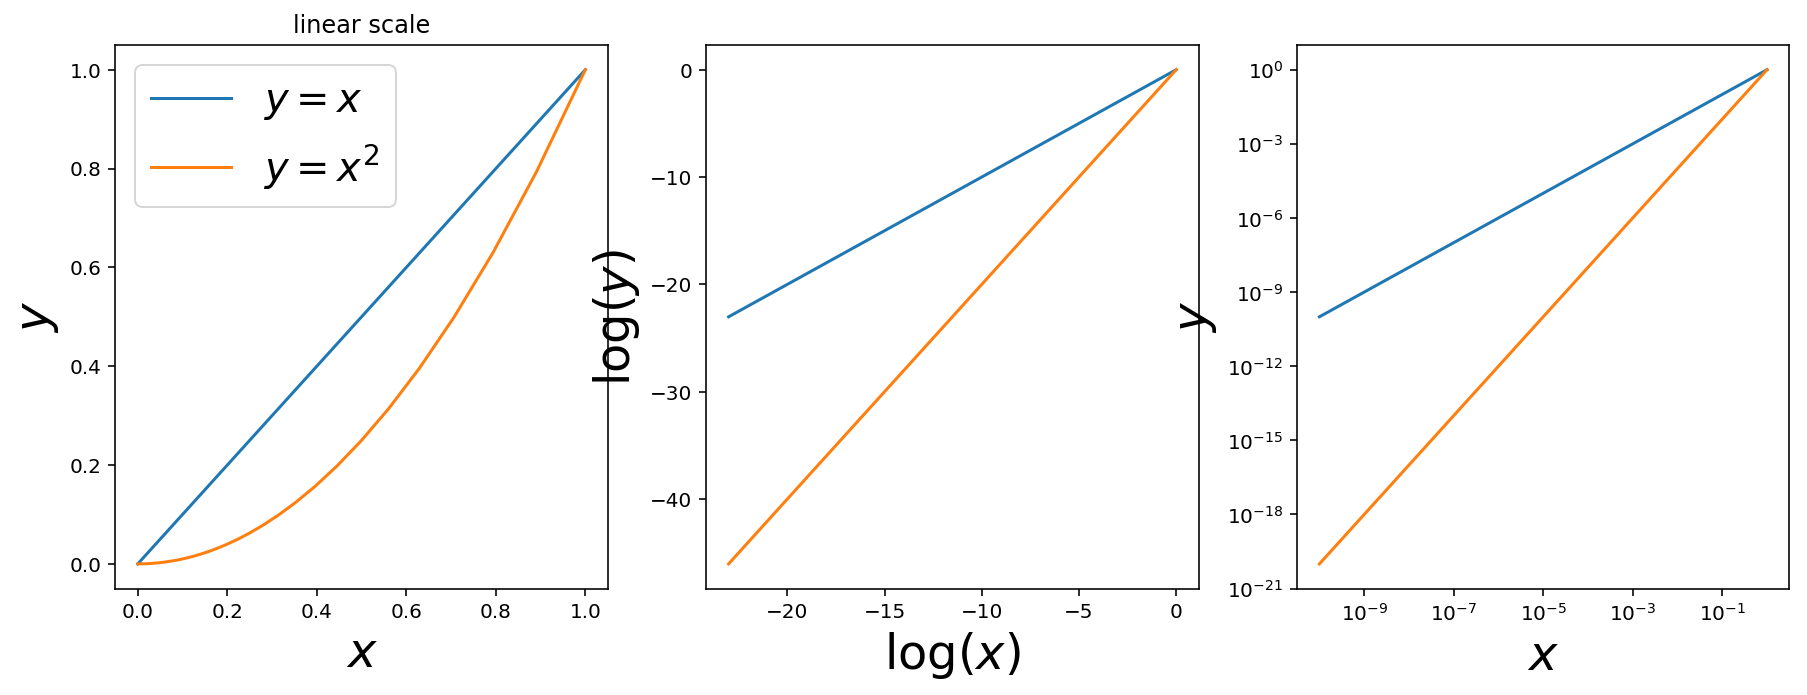

In [3]:
x = logspace(-10, 0, 200)
y1 = x
y2 = x**2

fig = figure(1, [15, 5])

fig.add_subplot(131)
plot(x, y1, label='$y=x$')
plot(x, y2, label='$y=x^2$')
title('linear scale')
legend(fontsize=20) ## figure legend, uses the optional `label=''` parameter in the plot commands
                    ## note that these labels use LaTeX, so are of the form `'$ some math $'`
                    ## sometime LaTeX symbols confuse Python, so it is better to use `r'$ some math$'`
xlabel(r'$x$', fontsize=24) ## x axis label
ylabel(r'$y$', fontsize=24) ## y axis label

fig.add_subplot(132)
plot(log(x), log(y1))
plot(log(x), log(y2))
xlabel(r'$\log(x)$', fontsize=24) ## x axis label
ylabel(r'$\log(y)$', fontsize=24) ## y axis label

fig.add_subplot(133)
loglog(x, y1)
loglog(x, y2)
xlabel(r'$x$', fontsize=24) ## x axis label
ylabel(r'$y$', fontsize=24); ## y axis label

# Example: finite difference error
Suppose we are interested in coputing a numerical approximation to the derivative of
$$ f(x) = \sin(x).$$
Of course, we know what the derivative is already, namely,
$$ f'(x) = \cos(x).$$
We often use a test problem like this, where we know the exact answer, to explore numerical approximation methods.

Our goal is to derive a numerical scheme for computing an approximation of the derivative of a function, using only values of the function at two or more points. Recall that the definition of the derivative is
$$ f'(x) = \lim_{h\to0} \frac{f(x+h) - f(x)}{h}. $$
Of course, we cannot take a limit with a computer. There is a limit to how small we can make $h$ on a computer.
To derive a numerical approximation, we could simply take the constant $h > 0$ to be some small fixed value. Then, an approximation of the derative is
$$ f'(x) \approx \frac{f(x+h) - f(x)}{h}.$$

What error do we make by using $h>0$ small but not considering the limit $h\to 0$? The absolute error in our approximation is given by
$$\mathcal{E}_{\rm abs} = \left \vert\frac{f(x+h) - f(x)}{h} - f'(x) \right \vert. $$
To derive the error, we expand our function in a Taylor's series, with
$$ f(x + h) = f(x) + hf'(x) + \frac{h^2}{2}f''(x) + O(h^3). $$
Substituting the Taylor's series into the absolute error yields
\begin{align*}
\mathcal{E}_{\rm abs} &= \left \vert
\frac{1}{h}\left(hf'(x) + \frac{h^2}{2}f''(x) + O(h^3)\right) - f'(x) \right \vert \\
  &= \left \vert f'(x) + \frac{h}{2}f''(x) + O(h^2) - f'(x)\right \vert \\
  &= \left \vert  \frac{h}{2}f''(x) + O(h^2) \right \vert \\
  &= \frac{h}{2}\left \vert  f''(x)\right \vert + O(h^2) 
\end{align*}


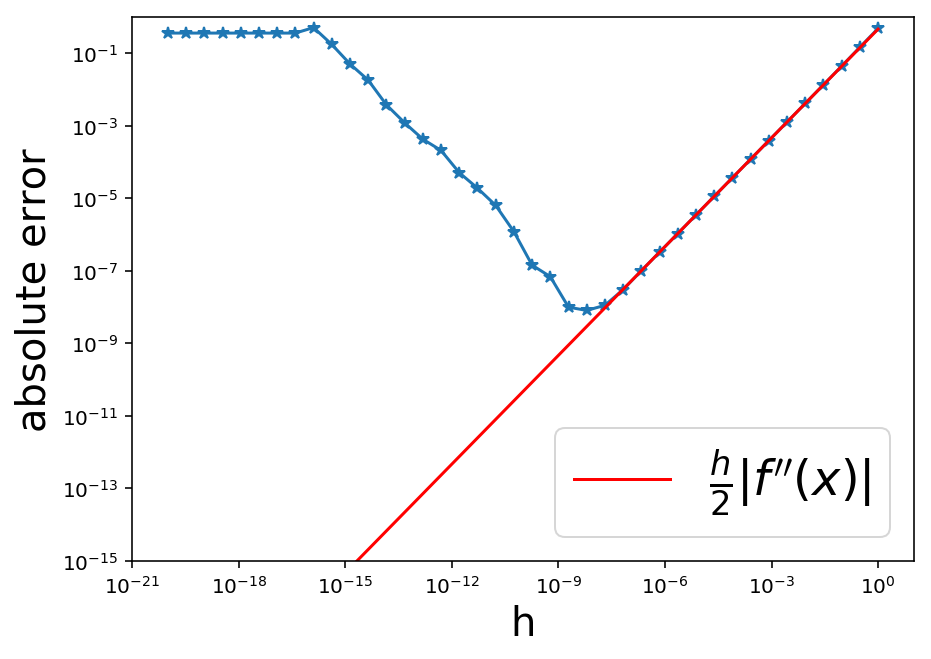

In [2]:
x0 = 1.2 ## point that we compute the derivative at (ie d/dx sin(x) at x = x0)
f0 = sin(x0) ## f(x0)
fp = cos(x0) ## f'(x0) the `p` means 'prime'
fpp = -sin(x0) ## f''(x0)
i = linspace(-20, 0, 40) ## `linspace` gives a range of values between two end points
##                          in this case 40 points, between -20 and 0
h = 10.0**i ## this is our approx parameter, it is an array of values 
##             between 10^(-20) and 10^(0)
fp_approx = (sin(x0 + h) - f0)/h ## the derivative approximation
err = absolute(fp - fp_approx) ## the full absolute error
d_err = h/2*absolute(fpp) ## the formula for the discretization error, derived above
            
figure(1, [7, 5]) ## creates a blank figure 7 inches (wide) by 5 inches (height)
loglog(h, err, '-*') ## makes a plot with a log scale on both the x and y axis
loglog(h, d_err, 'r-', label=r'$\frac{h}{2}\vert f^{\prime\prime}(x) \vert $')
xlabel('h', fontsize=20) ## puts a label on the x axis
ylabel('absolute error', fontsize=20) ## puts a label on the y axis
ylim(1e-15, 1) ## places limits on the yaxis for our plot
legend(fontsize=24); ## creates a figure legend (uses the `label=...` arguments in the plot command)

For $h$ small but not too small, the absolute error is dominated by the discretization error, $\frac{h}{2}\vert f''(x) \vert$, which is larger than other sources of error such as roundoff error. Once $h < 10^{-8}$, the discretization error becomes smaller than the roundoff error, and the roundoff error continues to get larger as $h\to 0$.

# Example: Euler's Method: Logistic growth
Consider the Logistic Growth equation
$$ \dot{x} = rx \left(1 - \frac{x}{K}\right),$$
where $r$ is the intrinsic growth rate and $K$ is the population carying capacity. We will need an initial condition of the form 
$$ x(0) = x_0,$$
where $x_0 \geq 0$.

Euler's Method can be written as
$$ x(t + \Delta t) = x(t) + \Delta t f(x(t)), \qquad f(x) = rx \left(1 - \frac{x}{K}\right) $$
We can code this by using a `for loop` as follows.

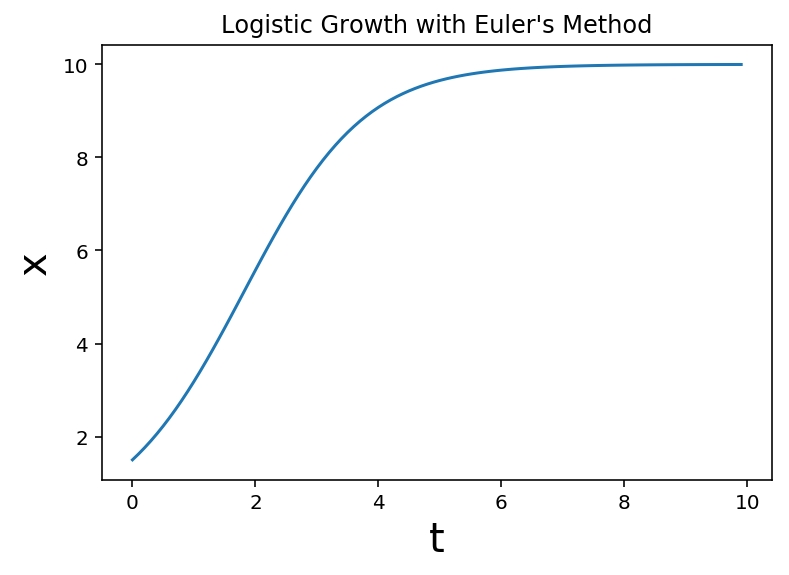

In [4]:
### Model Parameters
r = 1. # intrinsic growth rate
K = 10. # carrying capacity
x0 = 1.5 # the initial condition (TRY CHANGING THIS VALUE)

### Euler's method parameters
Delta_t = 0.1 # The size of the time step
Nsteps = 100 # The number of time steps to run
x = zeros(Nsteps) # an array of zeros to store the solution in
x[0] = x0 # store the initial condition
def f_logistic(x): # the ligistic growth RHS function
    return r*x*(1 - x/K)

####### The simulation loop #########
for n in arange(1, Nsteps): # loop from n=1 up to n=Nsteps-1
    x[n] = x[n-1] + Delta_t*f_logistic(x[n-1])

####### Plot the solution #########
t = Delta_t*arange(Nsteps) 
plot(t, x)
title("Logistic Growth with Euler's Method")
xlabel('t', fontsize=20)
ylabel('x', fontsize=20);

## Let's make an interactive widget so we can explore different choices of the initial condition

To make this, I just cut and pasted the code in the cell above into a function and used a `decorator`. So really I just added two lines of new code (the first two lines below).

In [10]:
### The first line is a `decorator`, which are used to modify a function
### This decorator turn a function that makes a plot into an interactive widget
### The input arguments to the function are turned into sliders
@interact(x0=(0., 20., 0.5))
def logistic_widget(x0=1.):
    ### Model Parameters
    r = 1. # intrinsic growth rate
    K = 10. # carrying capacity

    ### Euler's method parameters
    Delta_t = 0.1 # The size of the time step
    Nsteps = 100 # The number of time steps to run
    x = zeros(Nsteps) # an array of zeros to store the solution in
    x[0] = x0 # store the initial condition
    def f_logistic(x): # the ligistic growth RHS function
        return r*x*(1 - x/K)

    ####### The simulation loop #########
    for n in arange(1, Nsteps): # loop from n=1 up to n=Nsteps-1
        x[n] = x[n-1] + Delta_t*f_logistic(x[n-1])

    ####### Plot the solution #########
    t = Delta_t*arange(Nsteps) 
    plot(t, x)
    ylim(0, K + 5)
    title("Logistic Growth with Euler's Method")
    xlabel('t', fontsize=20)
    ylabel('x', fontsize=20);

interactive(children=(FloatSlider(value=1.0, description='x0', max=20.0, step=0.5), Output()), _dom_classes=('…